In [1]:
import pandas as pd

C:\Users\d4rsh\AppData\Local\Temp\ipykernel_6220\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("data/archive/housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
print(df.shape)

(20640, 10)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

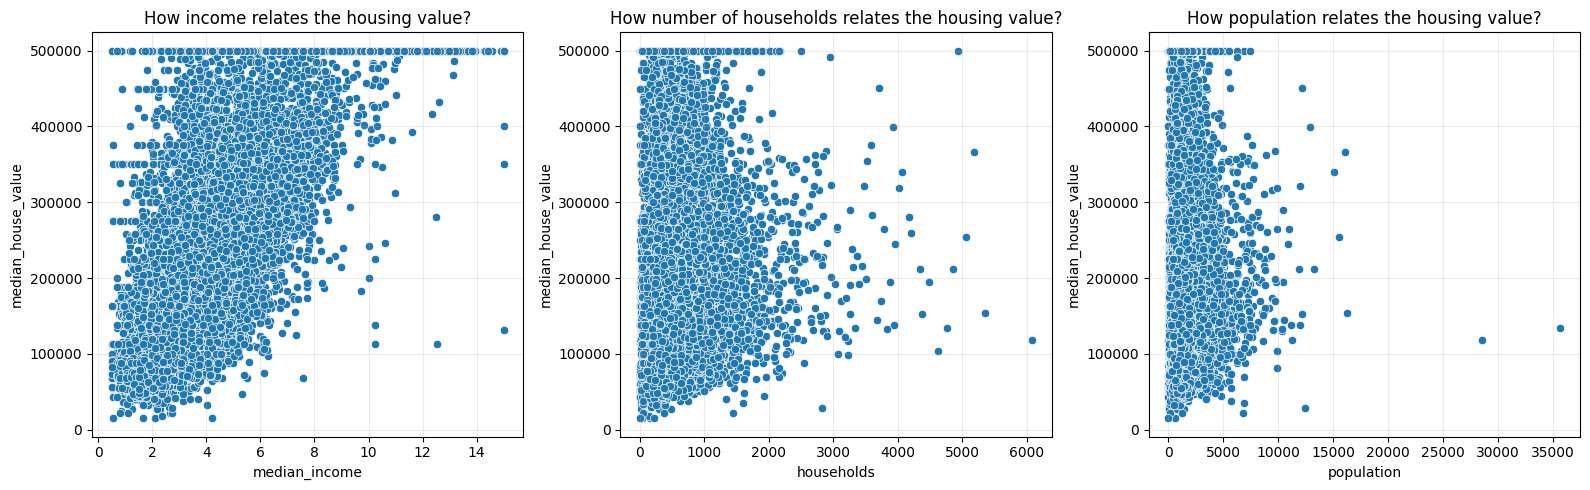

In [37]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.scatterplot(df, x="median_income", y="median_house_value")
plt.title("How income relates the housing value?")
plt.grid(alpha=0.25)

plt.subplot(1,3,2)
sns.scatterplot(df, x="households", y="median_house_value")
plt.title("How number of households relates the housing value?")
plt.grid(alpha=0.25)

plt.subplot(1,3,3)
sns.scatterplot(df, x="population", y="median_house_value")
plt.title("How population relates the housing value?")
plt.grid(alpha=0.25)

plt.tight_layout()
plt.show()

In [59]:
import numpy as np
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [47]:
model = LinearRegression()

In [49]:
model.fit(X=df[["median_income"]], y=df[["median_house_value"]])

LinearRegression()

In [54]:
print(f"Intercept: {model.intercept_}")
print(f"Intercept: {model.coef_}")

Intercept: [45085.57670327]
Intercept: [[41793.8492019]]


In [56]:
pred = model.intercept_ + model.coef_ * 12
print(f"Prediction : {pred}")

Prediction : [[546611.76712602]]


In [64]:
print(f"Prediction : {model.predict(X=[[12]])}")

Prediction : [[546611.76712602]]


In [69]:
model.predict(X=df[["median_income"]])

array([[393027.73007889],
       [392033.03646789],
       [348400.25790111],
       ...,
       [116135.12034649],
       [123123.05193305],
       [144914.36490692]])

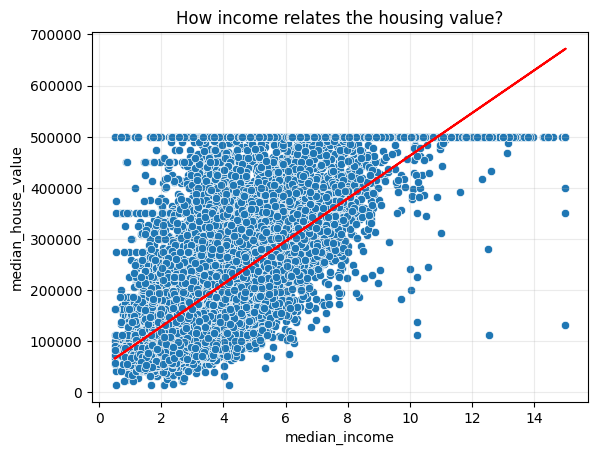

In [87]:
sns.scatterplot(df, x="median_income", y="median_house_value")
plt.plot(df["median_income"],model.predict(X=df[["median_income"]]), color="red")
plt.title("How income relates the housing value?")
plt.grid(alpha=0.25)
plt.show()

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [84]:
mae = mean_absolute_error(df['median_house_value'], model.predict(X=df[["median_income"]]))
print(f"MAE: {mae}")
mse = mean_squared_error(df['median_house_value'], model.predict(X=df[["median_income"]]))
print(f"MSE: {mse}")

MAE: 62625.9337911434
MSE: 7011311502.929527
